<a href="https://colab.research.google.com/github/matinmazid/York_ML_certificate/blob/master/project2_individual/financial_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to classify records as one category or an other of financial tweets. The goal here is to help users to quickly sort through their tweets to help them find relevant financial data.
We can uncomment as necessary

In [36]:
!pip install xgboost
#!conda install -c conda-forge py-xgboost-cpu
#!conda install -c conda-forge py-xgboost-gpu
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!ls

sample_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import nltk
nltk.download('words')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

The goal here is to categorize tweets to help users quickly sort thought the influx of information in their twitter feed.

This corpus already comes classifed with integers, where
"0": "Analyst Update",
"1": "Fed | Central Banks",
"2": "Company | Product News",
"3": "Treasuries | Corporate Debt",
"4": "Dividend",
"5": "Earnings",
"6": "Energy | Oil",
"7": "Financials",
"8": "Currencies",
"9": "General News | Opinion",
"10": "Gold | Metals | Materials",
"11": "IPO",
"12": "Legal | Regulation",
"13": "M&A | Investments",
"14": "Macro",
"15": "Markets",
"16": "Politics",
"17": "Personnel Change",
"18": "Stock Commentary",
"19": "Stock Movement"

In [4]:
# https://www.kaggle.com/code/ahmadalijamali/twitter-financial-news-nlp-analysis-and-prediction/notebook
import pandas as pd

#df=pd.read_csv("./data/train_data.csv")
df=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ml_200_individual/train_data.csv")

CATEGORY_LOOKUP={
    0: "Analyst Update",
    1: "Fed | Central Banks",
    2: "Company | Product News",
    3: "Treasuries | Corporate Debt",
    4: "Dividend",
    5: "Earnings",
    6: "Energy | Oil",
    7: "Financials",
    8: "Currencies",
    9: "General News | Opinion",
    10: "Gold | Metals | Materials",
    11: "IPO",
    12: "Legal | Regulation",
    13: "M&A | Investments",
    14: "Macro",
    15: "Markets",
    16: "Politics",
    17: "Personnel Change",
    18: "Stock Commentary",
    19: "Stock Movement"
}

In [5]:
df.head()

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0


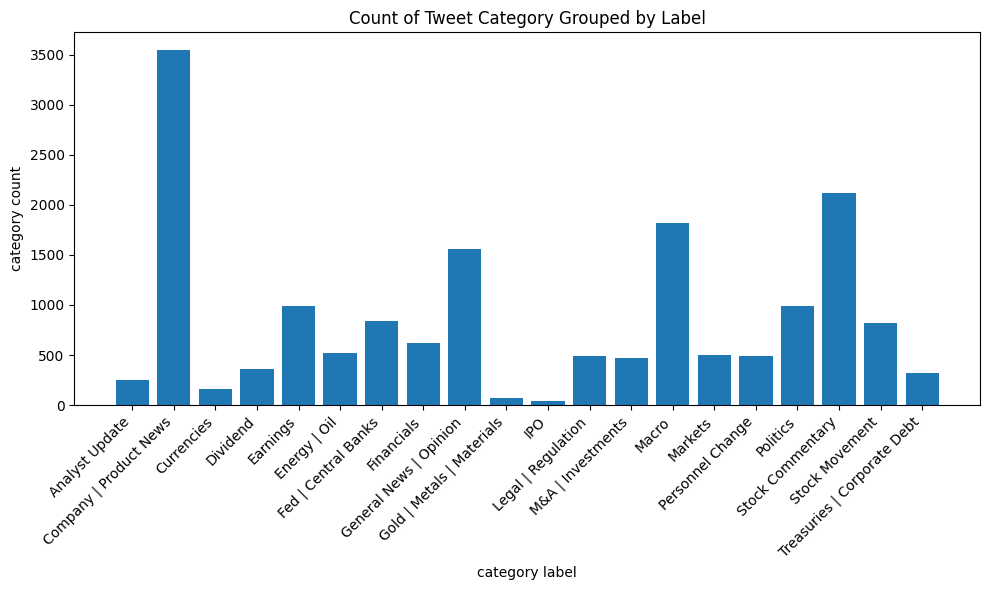

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#create a text_label field
df["text_label"]=df["label"].apply(lambda x: CATEGORY_LOOKUP[x])
label_text_counts_series=df.groupby("text_label")["text"].count()

groupbyDF=pd.DataFrame(label_text_counts_series)

groupbyDF.rename(columns={"text":"count"},inplace=True)
groupbyDF.reset_index(inplace=True)

# #Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(groupbyDF['text_label'], groupbyDF['count'])

plt.xlabel("category label")
plt.ylabel("category count")
plt.title("Count of Tweet Category Grouped by Label")
plt.xticks(range(len(groupbyDF['text_label'])), groupbyDF['text_label'], rotation=45, ha='right')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()





In [7]:
pd.set_option('display.max_colwidth', None)
df.groupby("text_label").sample(1)


,text,label,text_label
230,7 reasons why Lululemon's stock is a sell: Jefferies https://t.co/S4pHlJRxSo by @BrianSozzi https://t.co/DjxfQHh5oy,0,Analyst Update
3184,"$GE GE’s Latest Invention? ‘Vernova,’ The New Name For Its Power Business - WSJ https://t.co/X70pPSVhmn",2,Company | Product News
3876,"Euro at 1-week high, rowback in Fed rate hike bets knocks dollar - Reuters https://t.co/cm10P1HzTg",8,Currencies
4065,BlackRock Declares Quarterly Dividend of $4.88 on Common Stock https://t.co/qN7Oowm8Hz https://t.co/I1Ep8a19PP,4,Dividend
5316,$PEP | PepsiCo Q2 22 Earnings: - Revenue: $20.23B (exp $19.55B) - Core EPS: $1.86 (exp $1.74) - Sees FY Organic Revenue +10% (exp +8%),5,Earnings
5771,"OPEC’s first oil-market outlook for 2023 suggests no relief for squeezed consumers, with more crude needed from the group even though most members are already pumping flat out https://t.co/PBcYasWHH1",6,Energy | Oil
5880,"Fleming and coauthors assess the rationale, operations, and implications of the Fed’s “market functioning” purchases of Treasury and agency mortgage-backed securities following the COVID-19 outbreak. Read the full article: https://t.co/P9ws8sxdVl https://t.co/7g0q9nLMLL",1,Fed | Central Banks
7226,"Delta fell short of profit expectations in the second quarter and said high operating costs will persist through the rest of the year, weighing on a possible rebound https://t.co/OxJQAJLpaM",7,Financials
7723,"South Africa’s rooibos tea industry paid $716,000 to indigenous groups as a way to recognize the plant's original cultivators https://t.co/r1hquaxZDN",9,General News | Opinion
8859,"$NUGT: Gold stocks under pressure today on strength in the dollar: NUGT -8.8%, NEM -5.3%, GOLD -4.6%, AEM -4.1%, FNV... https://t.co/vmRGmyBooP",10,Gold | Metals | Materials


Here we see that there are dollars signs and urls

Clen up date
change % to percent </br>
change html ecape '&amp'; '&lt'; '&gt'; and, less than, greater than respectively </br>
change &, <, > as above

We also want to remove any other non ascii character after translating the above.

we want to use a standard list of stop words


In [8]:

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

stopword_list = nltk.corpus.stopwords.words("english")

# there is no  symantic information in a url on its own
# we'd have to get the url's content but there are also paywall issues.
# we also want to compile this regex outside of any loops
myUrlFinder=re.compile(r'(.*)(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)(.*)')



def clean_text(text):
    text = text.replace("%", " percent ")
    text = text.replace("&amp;", " and ")
    text = text.replace("&lt;", "<")
    text = text.replace("&gt;", ">")
    text = text.replace("<", " less than ")
    text = text.replace(">", " greater than ")
    # the $ is abmigous, sometimes its related to a symbol, sometimes its related
    # to a dollar amount.
    text = text.replace("$", "")
    #remove non ascii char


    matches=myUrlFinder.match(text)
    # put the string back together
    while matches:
      text=matches.group(1)+" "+matches.group(3)
      matches=myUrlFinder.match(text)


    text= re.sub(r"[^A-Za-z0-9 ]","",text,flags=re.IGNORECASE)
    text=text.lower()
    tokenizer=ToktokTokenizer()
    tokens=tokenizer.tokenize(text)
    tokens=[word for word in tokens if word not in stopword_list]
    text=" ".join(tokens)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df["cleaned_text"]=df["text"].apply(clean_text)

In [10]:
df.groupby("text_label").sample(1,random_state=100)

,text,label,text_label,cleaned_text
115,"$INTC - Susquehanna cautious on Intel going into Q2, citing 'deteriorating PC demand' https://t.co/gM2iS1DUCJ",0,Analyst Update,intc susquehanna cautious intel going q2 citing deteriorating pc demand
2194,New Lamps Plus Store-Based Customer Care Team Allows Certified Professional Sales Agents to Assist both Pro Industry Clientele and Store Customers https://t.co/VhieLGyd1x https://t.co/ui7jvFa3p7,2,Company | Product News,new lamps plus storebased customer care team allows certified professional sales agents assist pro industry clientele store customers
3893,PBoC Sets Yuan Mid-Point At 6.7287 / Dlr VS Last Close 6.7140,8,Currencies,pboc sets yuan midpoint 67287 dlr vs last close 67140
4204,$BSCE - Invesco BulletShares 2023 USD Emerging Markets Debt ETF declares monthly distribution of $0.0458 https://t.co/OAberGJnwv,4,Dividend,bsce invesco bulletshares 2023 usd emerging markets debt etf declares monthly distribution 00458
4927,$DFS - Discover Financial Services Q2 2022 Earnings Preview https://t.co/Guh1DSwcci,5,Earnings,dfs discover financial services q2 2022 earnings preview
5384,Copper rout worsens as recession fears hammer commodities markets https://t.co/bRIUzyr8c1,6,Energy | Oil,copper rout worsens recession fears hammer commodities markets
6352,"Traders See 175Bps BoE Hikes By Year-End, First Time In Three Weeks",1,Fed | Central Banks,traders see 175bps boe hikes yearend first time three weeks
6863,"Netflix lost 970,000 subscribers in Q2, beating Wall Street estimates by over 1 million https://t.co/bJWp7aZVn4",7,Financials,netflix lost 970000 subscribers q2 beating wall street estimates 1 million
7670,Jennifer Lopez and Ben Affleck were wed Saturday in a late-night Las Vegas drive-through chapel https://t.co/f4JLwCUVoO,9,General News | Opinion,jennifer lopez ben affleck wed saturday latenight las vegas drivethrough chapel
8865,$COMDX: Metals Settlement Prices https://t.co/3Xii3Fx8cW,10,Gold | Metals | Materials,comdx metals settlement prices


In [11]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
texts_train, texts_test, labels_train, labels_test, indices_train, indices_test  = train_test_split(df["cleaned_text"], df["label"], df.index,test_size=0.2, random_state=42)

In [13]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

In [14]:
# Train the XGBoost model
model = xgb.XGBClassifier(n_jobs=-1)
model.fit(X_train, labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [15]:
texts_train.head()
labels_train.loc[12164]

15

In [16]:
#us bank stocks jumped nearly two months friday citigroups strong secondquarter results helping lift sentiment entire sector -> markets
model.predict(vectorizer.transform(["us bank stocks jumped nearly two months friday citigroups strong secondquarter results helping lift sentiment entire sector"]))

array([15])

The overall accruacy isnt very good. We should look at how we can tune this model

In [17]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.58%


Lets take a closer look at what our problems are

If we take a look at the confusion matrix. We see that the product news and company/product news and general news are very closely correlated.
We may have to look for something else to help us decide between the two
or aggregate the category.

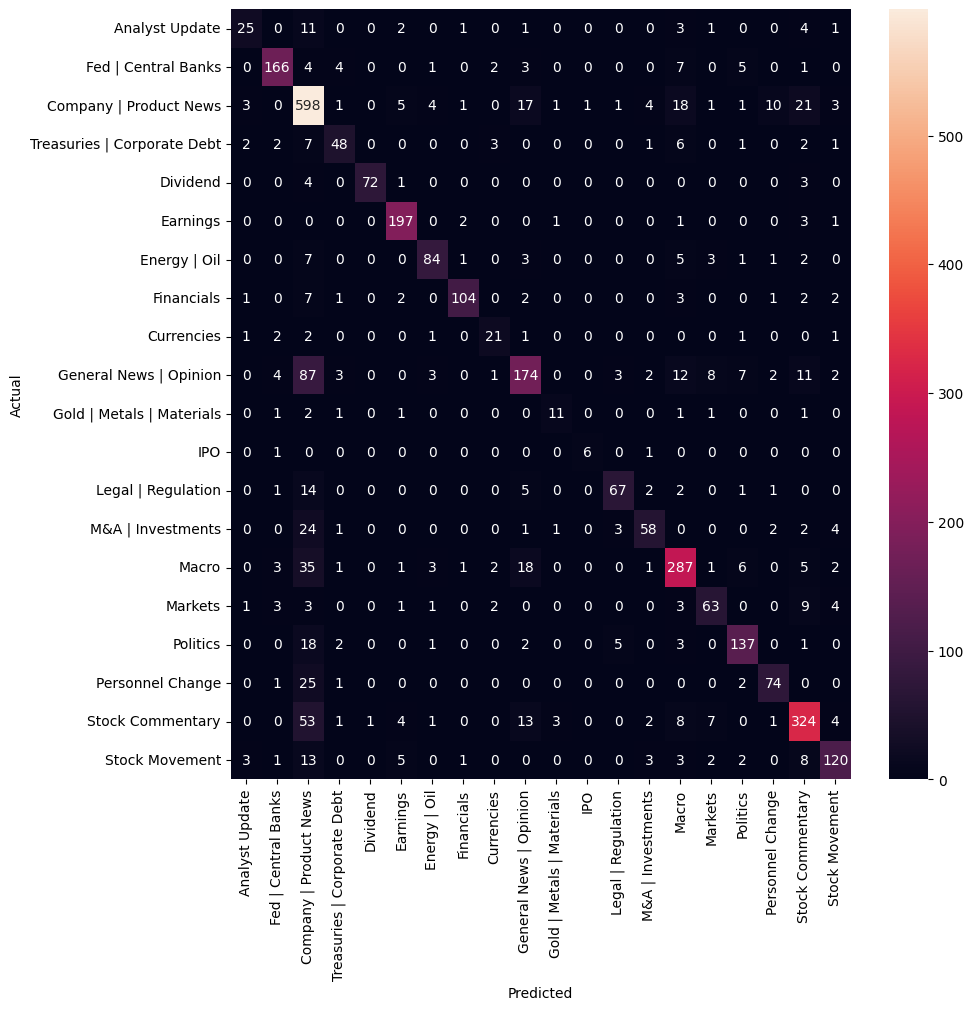

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

category_id_df = df[['text_label', 'label']].drop_duplicates().sort_values('label')

conf_mat = confusion_matrix(labels_test , predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.text_label.values, yticklabels=category_id_df.text_label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Lets take a look at a sample of compan news and product news.

In [56]:
a1=df[(df["label"]==2)].sample(3)
a2=df[(df["label"]==9)].sample(3)

b=pd.concat([a1,a2],axis=0)
b

,text,label,text_label,cleaned_text
531,$WFG: West Fraser releases statement; has not received a proposal and there are no ongoing discussions regarding the... https://t.co/9vMwG8hsCR,2,Company | Product News,wfg west fraser releases statement received proposal ongoing discussions regarding
3689,Celsius Network reveals $1.2bn shortfall in bankruptcy filing https://t.co/ZGARZrUp6e,2,Company | Product News,celsius network reveals 12bn shortfall bankruptcy filing
1550,Xtrackers UK Regulatory Announcement: Net Asset Value(s) https://t.co/sbfWY3ogDr https://t.co/ANhYDZzoU9,2,Company | Product News,xtrackers uk regulatory announcement net asset values
7839,CityLab Daily: Is gunshot detection technology a waste? https://t.co/1cTwxEAJzi via @citylab,9,General News | Opinion,citylab daily gunshot detection technology waste via citylab
7423,These are the cities where rents have risen the most https://t.co/kFar7A2Cez,9,General News | Opinion,cities rents risen
7733,Chinese people are refusing to pay mortgages and getting beaten up for protesting at banks. The troubles may just be getting started https://t.co/xMPEgMWPHw via @opinion,9,General News | Opinion,chinese people refusing pay mortgages getting beaten protesting banks troubles may getting started via opinion


In [58]:
model.predict(vectorizer.transform(["Xtrackers UK Regulatory Announcement: Net Asset Value(s) https://t.co/sbfWY3ogDr https://t.co/ANhYDZzoU9"]))

array([2])

In [90]:
#lets add back the text and look for the mis labeled classes.
xx=pd.DataFrame(labels_test)
withPredictions=xx.assign(prediction=predictions)
withPredictionsAndText=pd.merge(withPredictions,df,left_index=True,right_index=True)
withPredictionsAndText.head()


,label_x,prediction,text,label_y,text_label,cleaned_text
4768,5,5,Emera Teleconference on August 10 to Discuss Q2 2022 Results https://t.co/KoJxf8sSP9 https://t.co/n7VzfukXWf,5,Earnings,emera teleconference august 10 discuss q2 2022 results
8983,12,16,"Feds say 2 NY residents used Trump fundraiser, photo in $27M investment scam https://t.co/5EobtnCBTT",12,Legal | Regulation,feds say 2 ny residents used trump fundraiser photo 27m investment scam
14959,18,18,"TAP, TAP, TAP, 21-ema broken across the board; $SPY $QQQ $DIA $XLF A little follow-through instead of a gap-up would be grrrreat. https://t.co/TZDmGQBbGu",18,Stock Commentary,tap tap tap 21ema broken across board spy qqq dia xlf little followthrough instead gapup would grrrreat
11299,14,14,Electricity use in Texas soared to a record high for the ninth time this year as extreme heat and the rapidly growing local economy tests the state’s grid https://t.co/bCu6ICNwdz,14,Macro,electricity use texas soared record high ninth time year extreme heat rapidly growing local economy tests states grid
5018,5,5,$WIT - Wipro Limited 2023 Q1 - Results - Earnings Call Presentation. https://t.co/ByLaADsRLA #markets #economy #stocks,5,Earnings,wit wipro limited 2023 q1 results earnings call presentation markets economy stocks


In [92]:
withPredictionsAndText[(withPredictionsAndText["prediction"]!=withPredictionsAndText["label_x"])]

,label_x,prediction,text,label_y,text_label,cleaned_text
8983,12,16,"Feds say 2 NY residents used Trump fundraiser, photo in $27M investment scam https://t.co/5EobtnCBTT",12,Legal | Regulation,feds say 2 ny residents used trump fundraiser photo 27m investment scam
12918,16,2,Ex-Trump adviser Bannon says he is willing to testify to January 6 panel https://t.co/ZQ9t8OmEe5,16,Politics,extrump adviser bannon says willing testify january 6 panel
6301,1,14,Eurozone Deposit Facility Rate Jul 21: 0.000% (est -0.250%; prev -0.500%) - Eurozone Main Refinancing Rate Jul 21: 0.500% (est 0.250%; prev 0.000%) - Eurozone Marginal Lending Facility Jul 21: 0.750% (est 0.500%; prev 0.250%),1,Fed | Central Banks,eurozone deposit facility rate jul 21 0000 percent est 0250 percent prev 0500 percent eurozone main refinancing rate jul 21 0500 percent est 0250 percent prev 0000 percent eurozone marginal lending facility jul 21 0750 percent est 0500 percent prev 0250 percent
9051,12,2,SHAREHOLDER ACTION REMINDER: The Schall Law Firm Encourages Purchasers of Celsius Network LLC’s Financial Products with Losses to Contact the Firm https://t.co/2sFyD7h9k2 https://t.co/kEjp1RWJuE,12,Legal | Regulation,shareholder action reminder schall law firm encourages purchasers celsius network llcs financial products losses contact firm
14532,18,9,"@dshamanaman @I_MT978 Looks like $TWTR got it, thanks Dave!",18,Stock Commentary,dshamanaman imt978 looks like twtr got thanks dave
...,...,...,...,...,...,...
16843,3,14,Treasury inflation-protected securities (TIPS) can provide insight into long-term inflation expectations. What are investors saying about future inflation? https://t.co/A63iwhuQWv https://t.co/mR9rZna2oj,3,Treasuries | Corporate Debt,treasury inflationprotected securities tips provide insight longterm inflation expectations investors saying future inflation
16867,3,18,US 10-Year Note Sale: - High Yield Rate: 2.960% (prev 3.030%) - Bid-Cover Ratio: 2.34 (prev 2.41) - Direct Accepted: 18.0% (prev 19.4%) - Indirect Accepted: 61.3% (prev 63.6%) - WI: 2.940%,3,Treasuries | Corporate Debt,us 10year note sale high yield rate 2960 percent prev 3030 percent bidcover ratio 234 prev 241 direct accepted 180 percent prev 194 percent indirect accepted 613 percent prev 636 percent wi 2940 percent
9675,13,2,Versant Diagnostics Strengthens Chicago-Area Presence with New Acquisitions https://t.co/jh0IcBJ23A https://t.co/jia0Ve7D1k,13,M&A | Investments,versant diagnostics strengthens chicagoarea presence new acquisitions
14194,18,2,"DDOG, SNOW, ZM - some big early moves in Software with Yields lower",18,Stock Commentary,ddog snow zm big early moves software yields lower


"0": "Analyst Update", "1": "Fed | Central Banks", "2": "Company | Product News", "3": "Treasuries | Corporate Debt", "4": "Dividend", "5": "Earnings", "6": "Energy | Oil", "7": "Financials", "8": "Currencies", "9": "General News | Opinion", "10": "Gold | Metals | Materials", "11": "IPO", "12": "Legal | Regulation", "13": "M&A | Investments", "14": "Macro", "15": "Markets", "16": "Politics", "17": "Personnel Change", "18": "Stock Commentary", "19": "Stock Movement"